# Churn Prediction Assessment - Exploratory Data Analysis

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200) # Display all columns

In [9]:
# Load the csv file into a dataframe without the index column and preview it
df = pd.read_csv("../data/raw/Modelo_Clasificacion_Dataset.csv", index_col=[0])
df.head()

,X,numero_de_cliente,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,Ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_mpagominimo,clase_binaria
0,1,4566150,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,20130520.0,14555.47,13.0,3837.6,CONTINUA
1,2,4566430,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,20060210.0,-11.55,2.0,35.1,CONTINUA
2,3,4566445,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,19960826.0,6788.67,4.0,1977.3,CONTINUA
3,4,4566621,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,20150204.0,2946.70,5.0,573.3,CONTINUA
5,6,4566907,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0

In [10]:
# Drop the first column 'X' that looks like an unnecessary index and the customer ID since it doesn't provide any useful information for our future models
# Dropear ID de cliente
df = df.drop(['X', 'numero_de_cliente'], axis=1)
df.head()

,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,Ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_mpagominimo,clase_binaria
0,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,20130520.0,14555.47,13.0,3837.6,CONTINUA
1,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,20060210.0,-11.55,2.0,35.1,CONTINUA
2,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,19960826.0,6788.67,4.0,1977.3,CONTINUA
3,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,20150204.0,2946.70,5.0,573.3,CONTINUA
5,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0,0.0,0,0.0,0,0.0,0,0.0,1,4,0,0,94,0.0,10.0,44226.0,1316.65,1540.48,0.0

In [11]:
# Rename columns: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,visa_marca_atraso,visa_cuenta_estado,visa_mfinanciacion_limite,visa_msaldototal,visa_msaldopesos,visa_msaldodolares,visa_mconsumospesos,visa_mconsumosdolares,visa_mlimitecompra,visa_mpagado,visa_mpagospesos,visa_mpagosdolares,visa_fechaalta,visa_mconsumototal,visa_cconsumos,visa_mpagominimo,clase_binaria
0,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,20130520.0,14555.47,13.0,3837.6,CONTINUA
1,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,20060210.0,-11.55,2.0,35.1,CONTINUA
2,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,19960826.0,6788.67,4.0,1977.3,CONTINUA
3,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,20150204.0,2946.70,5.0,573.3,CONTINUA
5,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0,0.0,0,0.0,0,0.0,0,0.0,1,4,0,0,94,0.0,10.0,44226.0,1316.65,1540.48,0.0

In [12]:
# Convert target variable into numeric format that is more suitable for most machine learning models
df['clase_binaria'] = df['clase_binaria'].map({'BAJA': 1, 'CONTINUA': 0})
print(df['clase_binaria'].unique())

[0 1]


In [13]:
# Preview dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170722 entries, 0 to 189593
Columns: 103 entries, cliente_vip to clase_binaria
dtypes: float64(49), int64(54)
memory usage: 135.5 MB


In [14]:
# Check column names and data types
# Temporarily display the full list of columns
pd.set_option('display.max_rows', None)  # Show all rows
print(df.dtypes)

# Reset to default after viewing
# pd.reset_option('display.max_rows')

cliente_vip                             int64
internet                                int64
cliente_edad                            int64
cliente_antiguedad                      int64
mrentabilidad                         float64
mrentabilidad_anual                   float64
mcomisiones                           float64
mactivos_margen                       float64
mpasivos_margen                       float64
cant_total_prod                         int64
tpaquete1                               int64
tpaquete2                               int64
tpaquete3                               int64
tpaquete4                               int64
tpaquete5                               int64
tpaquete6                               int64
tpaquete7                               int64
tpaquete8                               int64
tpaquete9                               int64
tcuentas                                int64
mdescubierto_preacordado              float64
mcuentas_saldo                    

In [15]:
# Check distinct values in some columns to figure out the correct data type
unique_values = df['visa_cuenta_estado'].unique()
print(unique_values)

[10. nan 12. 19. 11.]


In [16]:
# Change Visa_fechaalta data type to datetime.
# Ensure the column is treated as an integer (to remove decimal points), 
# but handle nulls properly by using 'errors' parameter if necessary.
df['visa_fechaalta'] = pd.to_numeric(df['visa_fechaalta'], errors='coerce')

# Convert to datetime, treating NaNs (null values) as valid dates
df['visa_fechaalta'] = pd.to_datetime(df['visa_fechaalta'], format='%Y%m%d', errors='coerce')
# Verify the changes

print(df['visa_fechaalta'].head())


0   2013-05-20
1   2006-02-10
2   1996-08-26
3   2015-02-04
5   2005-02-03
Name: visa_fechaalta, dtype: datetime64[ns]


In [17]:
# Change categorical fields into category data type instead of str since it's more efficient
# Metadata dictionary mapping columns to data types
# fields that start with a "t" (tiene/has)
# fields that start with a "c" (cantidad/quantity)
# fields that start with a "m" (monto/amount)

metadata = {
    "tcuentas": "category",
    "visa_cuenta_estado": "category"
}

# Update the data types in the DataFrame
for column, dtype in metadata.items():
    if column in df.columns:
        try:
            df[column] = df[column].astype(dtype)
        except ValueError:
            print(f"Error converting column {column} to {dtype}")

# Check the updated DataFrame
# Temporarily display the full list of columns
pd.set_option('display.max_rows', None)  # Show all rows
print(df.dtypes)

# Reset to default after viewing
pd.reset_option('display.max_rows')


cliente_vip                                    int64
internet                                       int64
cliente_edad                                   int64
cliente_antiguedad                             int64
mrentabilidad                                float64
mrentabilidad_anual                          float64
mcomisiones                                  float64
mactivos_margen                              float64
mpasivos_margen                              float64
cant_total_prod                                int64
tpaquete1                                      int64
tpaquete2                                      int64
tpaquete3                                      int64
tpaquete4                                      int64
tpaquete5                                      int64
tpaquete6                                      int64
tpaquete7                                      int64
tpaquete8                                      int64
tpaquete9                                     

In [18]:
# Transform visa_fechaalta into days of tenure
from datetime import datetime
df['visa_tenure_days'] = (datetime.now() - df['visa_fechaalta']).dt.days
df = df.drop(columns=['visa_fechaalta'])
df.head()

,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,visa_marca_atraso,visa_cuenta_estado,visa_mfinanciacion_limite,visa_msaldototal,visa_msaldopesos,visa_msaldodolares,visa_mconsumospesos,visa_mconsumosdolares,visa_mlimitecompra,visa_mpagado,visa_mpagospesos,visa_mpagosdolares,visa_mconsumototal,visa_cconsumos,visa_mpagominimo,clase_binaria,visa_tenure_days
0,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,14555.47,13.0,3837.6,0,4206.0
1,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,-11.55,2.0,35.1,0,6862.0
2,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,6788.67,4.0,1977.3,0,10317.0
3,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,2946.70,5.0,573.3,0,3581.0
5,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0,0.0,0,0.0,0,0.0,0,0.0,1,4,0,0,94,0.0,10.0,44226.0,1316.65,1540.48,0.00,1048.32,0.00,49140.0,0.0,-1861.64,0.00,

In [19]:
# Check for missing values
print("Columns with Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Columns with Missing Values:
visa_marca_atraso             6101
visa_cuenta_estado            6101
visa_mfinanciacion_limite     6101
visa_msaldototal              6101
visa_msaldopesos              6101
visa_msaldodolares            6101
visa_mconsumospesos          21503
visa_mconsumosdolares        21503
visa_mlimitecompra            6101
visa_mpagado                  6101
visa_mpagospesos             21503
visa_mpagosdolares           21503
visa_mconsumototal           21503
visa_cconsumos               21503
visa_mpagominimo              6101
visa_tenure_days              6101
dtype: int64


In [20]:
# Check the data types of the fields that contain nulls to figure out how to treat them
df[missing_values[missing_values > 0].index.tolist()].dtypes

visa_marca_atraso             float64
visa_cuenta_estado           category
visa_mfinanciacion_limite     float64
visa_msaldototal              float64
visa_msaldopesos              float64
visa_msaldodolares            float64
visa_mconsumospesos           float64
visa_mconsumosdolares         float64
visa_mlimitecompra            float64
visa_mpagado                  float64
visa_mpagospesos              float64
visa_mpagosdolares            float64
visa_mconsumototal            float64
visa_cconsumos                float64
visa_mpagominimo              float64
visa_tenure_days              float64
dtype: object

Looks like all the fields containing missing values are visa_*. The 6101 apparently never signed up for the credit card account. The remaining ones seem to be amounts/quantities can be interpreted as 0 if they're null. I considered dropping the 6101 rows and replacing the remaining ones with 0 but in those 6k rows there were 30% of the churn category which was already pretty small, so instead I'll be replacing all of them with 0.

In [21]:
# Convert null categorical fields into 'Unknown'
df['visa_cuenta_estado'] = df['visa_cuenta_estado'].cat.add_categories('unknown').fillna('unknown')

In [22]:
# Convert nulls to 0
columns_to_fill = [
    "visa_marca_atraso",
    "visa_mfinanciacion_limite",
    "visa_msaldototal",
    "visa_msaldopesos",
    "visa_msaldodolares",
    "visa_mconsumospesos",
    "visa_mconsumosdolares",
    "visa_mlimitecompra",
    "visa_mpagado",
    "visa_mpagospesos",
    "visa_mpagosdolares",
    "visa_mconsumototal",
    "visa_cconsumos",
    "visa_mpagominimo",
    "visa_tenure_days"
]

df[columns_to_fill] = df[columns_to_fill].fillna(0)

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [23]:
# Confirm the removal of missing values
print("Columns with Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)


In [24]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [25]:
# Apply one-hot encoding to the categorical fields ("tcuentas" and "visa_cuenta_estado")

df = pd.get_dummies(df, drop_first=True)
df.head()

,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,visa_marca_atraso,visa_mfinanciacion_limite,visa_msaldototal,visa_msaldopesos,visa_msaldodolares,visa_mconsumospesos,visa_mconsumosdolares,visa_mlimitecompra,visa_mpagado,visa_mpagospesos,visa_mpagosdolares,visa_mconsumototal,visa_cconsumos,visa_mpagominimo,clase_binaria,visa_tenure_days,tcuentas_2,visa_cuenta_estado_11.0,visa_cuenta_estado_12.0,visa_cuenta_estado_19.0,visa_cuenta_estado_unknown
0,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,14555.47,13.0,3837.6,0,4206.0,False,False,False,False,False
1,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,-11.55,2.0,35.1,0,6862.0,False,False,False,False,False
2,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,6788.67,4.0,1977.3,0,10317.0,False,False,False,False,False
3,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,2946.70,5.0,573.3,0,3581.0,False,False,False,False,False
5,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,

In [26]:
# Check the new amount of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170722 entries, 0 to 189593
Columns: 106 entries, cliente_vip to visa_cuenta_estado_unknown
dtypes: bool(5), float64(48), int64(53)
memory usage: 133.7 MB


We're seeing a total of 106 columns since tcuentas was (1, 2) and visa_cuenta_estado was (10, 11, 12, 19, unknown). Added a total of 3 new columns


Distribution of target variable (clase_binaria):
clase_binaria
0    168887
1      1835
Name: count, dtype: int64


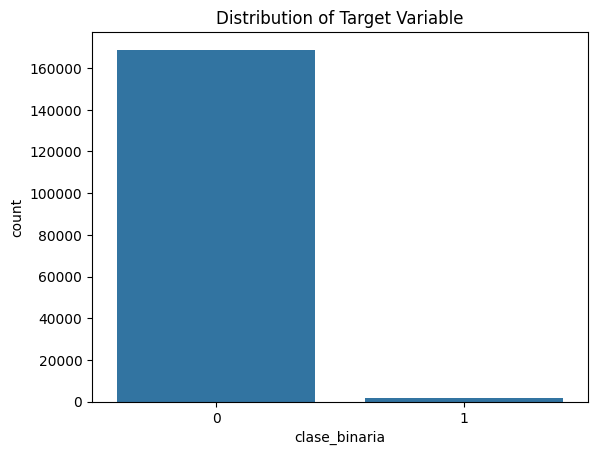

In [27]:
# Checking the distribution of the target variable
# The dataset appears to be unbalanced
target_column = 'clase_binaria'

print(f"\nDistribution of target variable ({target_column}):")
print(df[target_column].value_counts())
sns.countplot(data=df, x=target_column)
plt.title("Distribution of Target Variable")
plt.show()


Dataset is unbalanced. Since I'll be running models that support class weights I'll use that in order to balance it.
Using class weights adjusts the penalty during model training, assigning a higher weight to the minority class so that misclassifications cost more.

In [28]:
# Save the final procssed dataset to use in the prediction models

df.to_parquet("../data/processed/churn_prediction_dataset.parquet", index=False)